In [2]:
#importing libraries for project
#python's lxml library parses xml and html files
from lxml import html
#python requests library gets data from web pages
import requests
#libraries for data wrangling & cleaning
import pandas as pd
import numpy as np
import datetime as dt
#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#libraries for machine learning
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.model_selection import train_test_split # data split
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn import tree

In [3]:
#read in file for machine learning
mydata_1=pd.read_csv("mydata_1.csv")
#drop 1st column
mydata_1=mydata_1.iloc[:,1:]
mydata_1.head()

,year,TSU score_new,opponent score_new,attendance_new,TSUrushyards_new,TSUreceiveyards_new,TSUkreturnyards_new,TSUpreturnyards_new,TSUtackles,TSUtackleyd_new,TSUsacks_new,TSUsackyd_new,TSUpunt_new,locale_01,gametype_01,winloss
0,2003,37.0,20.0,18124.000000,113.0,365.0,69.0,18.753927,69,33.0,3.0,21.0,5.0,1,0,Win
1,2003,24.0,31.0,18085.000000,141.0,146.0,147.0,8.000000,68,22.0,0.0,0.0,7.0,0,0,Loss
2,2003,44.0,14.0,16985.230366,209.0,132.0,138.0,18.753927,84,26.0,1.0,4.0,5.0,0,0,Win
3,2003,7.0,10.0,16985.230366,153.0,138.0,86.0,2.000000,50,22.0,0.0,0.0,6.0,0,0,Loss
4,2003,41.0,10.0,8434.000000,142.0,285.0,11.0,29.000000,76,46.0,4.0,22.0,3.0,1,1,Win


In [5]:
#check columns
mydata_1.columns

Index(['year', 'TSU score_new', 'opponent score_new', 'attendance_new',
       'TSUrushyards_new', 'TSUreceiveyards_new', 'TSUkreturnyards_new',
       'TSUpreturnyards_new', 'TSUtackles', 'TSUtackleyd_new', 'TSUsacks_new',
       'TSUsackyd_new', 'TSUpunt_new', 'locale_01', 'gametype_01', 'winloss'],
      dtype='object')

In [6]:
#data split for test and training data sets
#create separate datasets for independent and dependent variables
x = mydata_1.drop('winloss', axis = 1).values
y =mydata_1['winloss'].values

#split x (features) and y (outcome) datasets with 30% of data in test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =0)

In [7]:
#create decision tree model (logistic regression model couldn't converge)
tree_model = DecisionTreeClassifier(max_depth = 7, criterion = 'entropy', random_state=0)
#fit model to training data
tree_model.fit(x_train, y_train)
#use model to predict on test data
tree_yhat = tree_model.predict(x_test)

In [8]:
#Accuracy score (compare predicted values based on test data (tree_yhat) with actual outcomes in test data)
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))

Accuracy score of the Decision Tree model is 0.7586206896551724


[Text(334.8, 587.0880000000001, 'opponent score_new <= 20.5\nentropy = 1.0\nsamples = 133\nvalue = [66, 67]\nclass = Win'),
 Text(223.20000000000002, 456.624, 'TSU score_new <= 17.5\nentropy = 0.516\nsamples = 52\nvalue = [6, 46]\nclass = Win'),
 Text(167.4, 326.1600000000001, 'opponent score_new <= 15.5\nentropy = 1.0\nsamples = 12\nvalue = [6, 6]\nclass = Loss'),
 Text(111.60000000000001, 195.69600000000003, 'TSUsacks_new <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]\nclass = Win'),
 Text(55.800000000000004, 65.23200000000008, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Loss'),
 Text(167.4, 65.23200000000008, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Win'),
 Text(223.20000000000002, 195.69600000000003, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Loss'),
 Text(279.0, 326.1600000000001, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40]\nclass = Win'),
 Text(446.40000000000003, 456.624, 'TSU score_new <= 30.0\nentropy = 0.826\nsamples = 81\nvalue = [60, 2

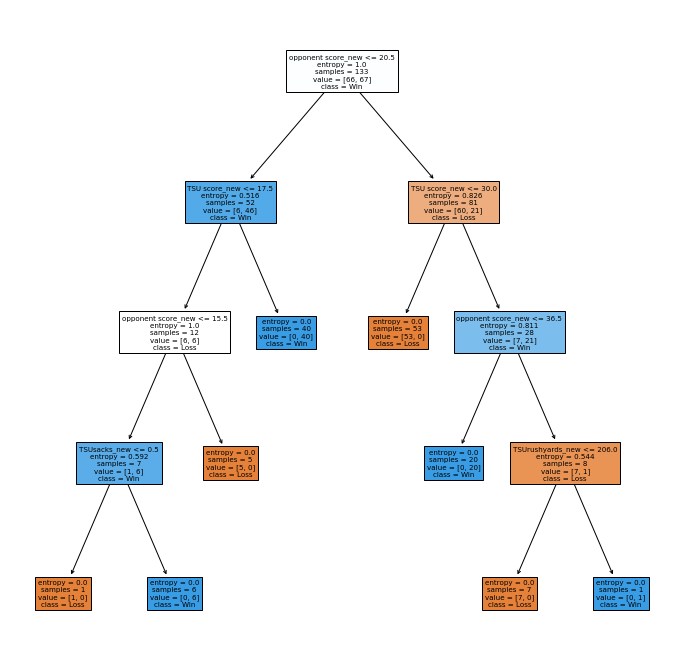

In [9]:
#print decision tree
#create labels for features
fn=['year', 'TSU score_new', 'opponent score_new', 'attendance_new',
       'TSUrushyards_new', 'TSUreceiveyards_new', 'TSUkreturnyards_new',
       'TSUpreturnyards_new', 'TSUtackles', 'TSUtackleyd_new', 'TSUsacks_new',
       'TSUsackyd_new', 'TSUpunt_new', 'locale_01', 'gametype_01', ]
cn=['Loss','Win']
#plot tree
plt.rcParams['figure.figsize']=[12,12]
tree.plot_tree(tree_model, feature_names=fn,class_names=cn, filled=True)